In [283]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 11

In [284]:
f = lambda x: (x + 1) / x

def seq_gen(x_0, n):
    x = x_0
    for i in range(n):
        yield x
        x = f(x)

In [285]:
SIZE = 100
initial_values = np.random.uniform(low=-5, high=5, size=SIZE)
n = 100

seq = [list(seq_gen(x_0, n)) for x_0 in initial_values]




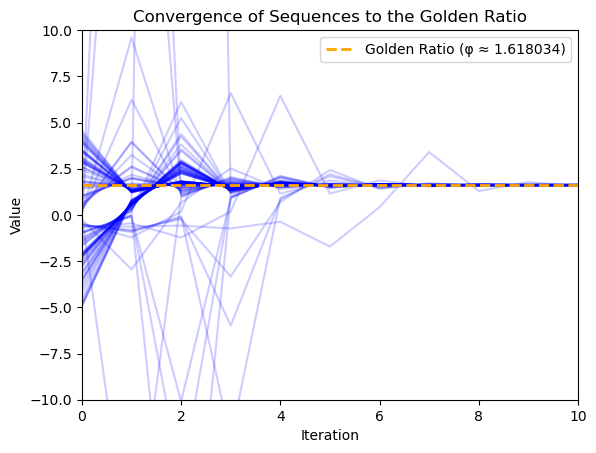

In [286]:


# Plot each sequence with low opacity
for i in range(SIZE):
    plt.plot(range(n), seq[i], alpha=0.2, color='blue')

# Plot the golden ratio as a reference
golden_ratio = (1 + np.sqrt(5)) / 2
plt.axhline(y=golden_ratio, color='orange', linestyle='--', linewidth=2, 
           label=f'Golden Ratio (φ ≈ {golden_ratio:.6f})')

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Convergence of Sequences to the Golden Ratio')
plt.legend()

# Zoom in on the convergence region
plt.ylim(-10, 10)
plt.xlim(0, 10)

plt.show()

# Problem 12

In [287]:
def generate_D(n, var_lambda):
    d = np.random.random_sample(n)
    d = np.flip(np.sort(d))
    d[0] *= var_lambda
    return np.diag(d)

def generate_J(n, var_lambda):
    D = generate_D(n, var_lambda)
    j = np.flip(np.sort(np.random.randint(0,1,n-1)))
    D = D + np.diag(j, 1)
    return D
    
def generate_orthogonal(n):
    random_matrix = np.random.random_sample((n, n))
    Q,R = np.linalg.qr(random_matrix)
    return Q

def generate_QDQ(n, var_lambda):
    return generate_orthogonal(n) @ generate_D(n, var_lambda) @ generate_orthogonal(n).T

def generate_SDS(n, var_lambda):
    D = generate_D(n, var_lambda)
    S = np.random.random_sample((n, n))
    return S @ D @ np.linalg.inv(S)

def generate_QJQ(n, var_lambda):
    return generate_orthogonal(n) @ generate_J(n, var_lambda) @ generate_orthogonal(n).T

def generate_SJS(n, var_lambda):
    J = generate_J(n, var_lambda)
    S = np.random.random_sample((n, n))
    return S @ J @ np.linalg.inv(S)

def power_iteration_generator(A, x_0):
    x = x_0 / np.linalg.norm(x_0)
    while True:
        x = (A @ x) / np.linalg.norm(x)
        yield x

def power_iteration_approximation(A, x_0, SIZE):
    power_iteration = power_iteration_generator(A, x_0)
    for _ in range(SIZE):
        eigvec = next(power_iteration)
        eigval = (eigvec.T @ A @ eigvec) / (eigvec.T @ eigvec)
        yield eigval, eigvec



In [288]:
n = 100
SIZE = 100
var_lambda = 2

A = generate_QDQ(n, var_lambda)
x_0 = np.random.random_sample(n)

iteration = list(power_iteration_approximation(A, x_0, SIZE))

eigval, eigvec = iteration[-1]
exact_eigval = np.sort(np.abs(np.linalg.eig(A)[0]))[-1]

print(f"For the last iteration:")
print(f"Norm of residual (A @ eigvec - eigval * eigvec): {np.linalg.norm(A @ eigvec - eigval * eigvec)}")
print(f"Approximated dominant eigenvalue: {eigval}")
print(f"Exact dominant eigenvalue: {exact_eigval}")
print()

eigval_0, eigvec_0 = iteration[0]
print(f"For the first iteration:")
print(f"Norm of residual (A @ eigvec_0 - eigval_0 * eigvec_0): {np.linalg.norm(A @ eigvec_0 - eigval_0 * eigvec_0)}")
print(f"Approximated dominant eigenvalue: {eigval_0}")
print(f"Exact dominant eigenvalue: {exact_eigval}")


For the last iteration:
Norm of residual (A @ eigvec - eigval * eigvec): 3.4987269621826374e-16
Approximated dominant eigenvalue: 1.533769800658822
Exact dominant eigenvalue: 1.5337698006588192

For the first iteration:
Norm of residual (A @ eigvec_0 - eigval_0 * eigvec_0): 0.8087377641598426
Approximated dominant eigenvalue: 1.4733152356652786
Exact dominant eigenvalue: 1.5337698006588192


In [289]:
def plot_residuals(matrix_generator, SIZE = 100):
    n = 100
    lambdas = np.linspace(1.5, 5, 8)
    A_list = [matrix_generator(n, var_lambda) for var_lambda in lambdas]
    x_0 = np.random.random_sample(n)
    iteration_list = [list(power_iteration_approximation(A, x_0, SIZE)) for A in A_list]

    residual_list = [
        [np.linalg.norm(A_list[i] @ eigvec - eigval * eigvec) for eigval, eigvec in iteration] 
        for i,iteration in enumerate(iteration_list)]

    for i in range(8):
        plt.semilogy(range(SIZE), residual_list[i], label=f"$\\lambda$ = {lambdas[i]:.2f}")
    plt.legend()
    plt.xlabel('Iteration step')
    plt.ylabel(f'Residual norm: $\\|A \\cdot x - \\lambda \\cdot x\\|$')


Text(0.5, 1.0, 'For Matrix A=QDQ^T, Q orthogonal, D diagonal')

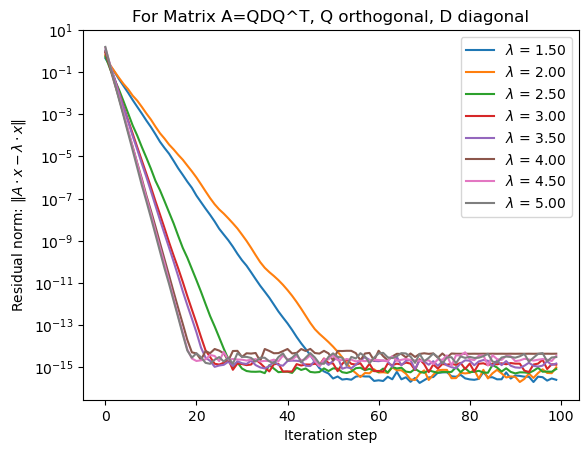

In [304]:
plot_residuals(generate_QDQ)
plt.title('For Matrix A=QDQ^T, Q orthogonal, D diagonal')

Text(0.5, 1.0, 'For Matrix A=SDS^-1, S invertible, D diagonal')

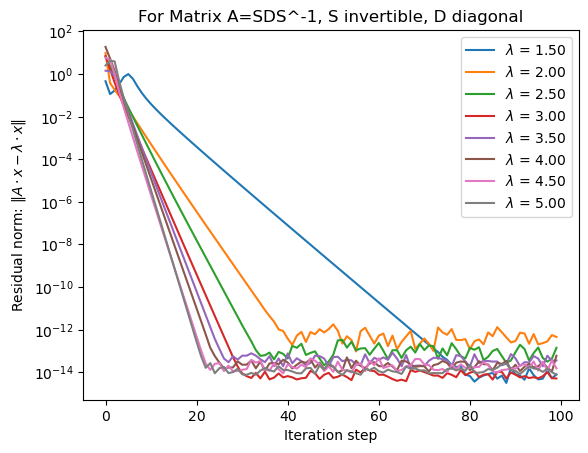

In [303]:
plot_residuals(generate_SDS)
plt.title('For Matrix A=SDS^-1, S invertible, D diagonal')

Text(0.5, 1.0, 'For Matrix A=QJQ^T, Q orthogonal, J Jordan form')

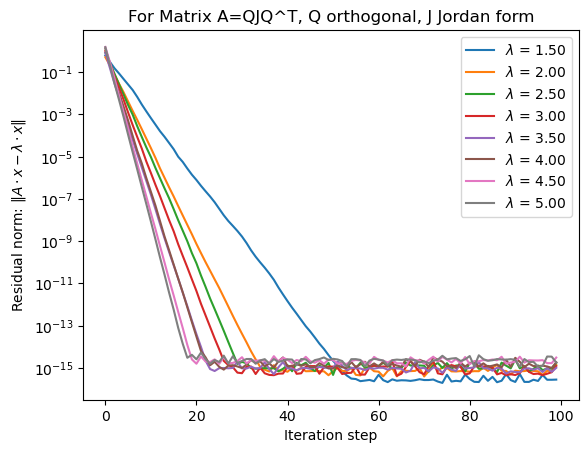

In [302]:
plot_residuals(generate_QJQ)
plt.title('For Matrix A=QJQ^T, Q orthogonal, J Jordan form')

Text(0.5, 1.0, 'For Matrix A=SJS^-1, S invertible, J Jordan form')

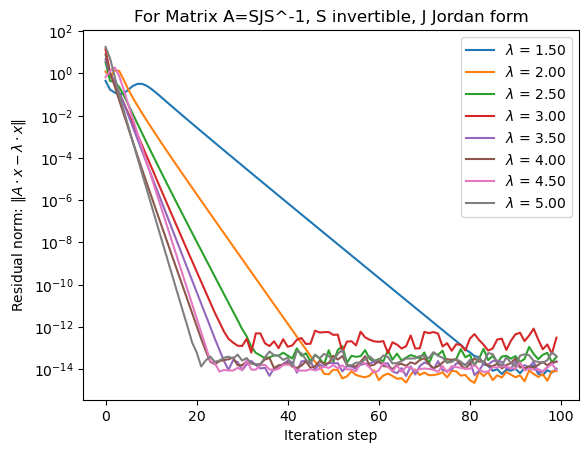

In [301]:
plot_residuals(generate_SJS)
plt.title('For Matrix A=SJS^-1, S invertible, J Jordan form')